In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cd '/content/drive/My Drive/Colab Notebooks/OSU/CS467_shared'
%cd '/content/drive/My Drive'

/content/drive/My Drive


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from skimage import color

In [ ]:
fpath = '/content/drive/My Drive/fma_large/146/'
fname = '146698.mp3' 

# create mel scale spectrogram from input .mp3 file
y, sr = librosa.load(fpath + fname)
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)

# normalize image between min and max 
img = 255 * ((mel_spect - mel_spect.min()) / (mel_spect.max() - mel_spect.min()))

# convert pixel values to 8 bit ints
img = img.astype(np.uint8)

# flip and invert image
img = np.flip(img, axis=0)
img = 255-img

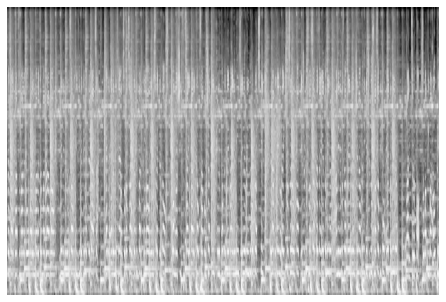

In [ ]:
fig = plt.figure(frameon=False)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)

# img = color.rgb2gray(img)
ax.imshow(img, aspect='auto', cmap='Greys')
fig.savefig('spec1.png', cmap='Greys')

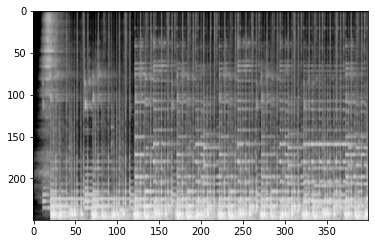

(400, 250)


In [ ]:
image = tf.keras.preprocessing.image.load_img('./spec1.png')
image = image.resize((400, 250))
plt.imshow(image)
plt.show()
print(image.size)